## Problem Statement :
Bike-sharing system are meant to rent the bicycle and return to the different place for the bike sharing purpose in Washington DC.You are provided with rental data spanning for 2 years. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

#### dataset link : https://www.kaggle.com/competitions/bike-sharing-demand/code?competitionId=3948

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
# to show the figures in the jupyter notebook itself
%matplotlib inline 

In [2]:
data = pd.read_csv('train_bikes.csv', parse_dates=['datetime']) 
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
data.tail() 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [29]:
def convert_date(df):
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['month'] = df['datetime'].dt.month
    df['hour'] = df['datetime'].dt.hour
    df['weekday'] = df['datetime'].dt.dayofweek
    df["day"]=df["datetime"].dt.day
    df["year"]=df["datetime"].dt.year
    df['dayofweek'] = df['datetime'].dt.dayofweek
    df['month_start'] = df['datetime'].dt.is_month_start
    df['woy'] = df['datetime'].dt.isocalendar().week.astype(int)
    
    return df

In [32]:
data=convert_date(data)
data.head()

,datetime,season,holiday,workingday,weather,Temperature(C),Dew Temperature(C),humidity(%),Wind Speed(m/s),Number of rented bikes,registered,count,month,hour,weekday,day,year,dayofweek,month_start,woy
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,5,1,2011,5,True,52
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,5,1,2011,5,True,52
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2,5,1,2011,5,True,52
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3,5,1,2011,5,True,52
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4,5,1,2011,5,True,52


In [4]:
col_names=list(data.columns)
for index,col_name in enumerate(col_names):
    print(index ," :" ,col_name)

0  : datetime
1  : season
2  : holiday
3  : workingday
4  : weather
5  : temp
6  : atemp
7  : humidity
8  : windspeed
9  : casual
10  : registered
11  : count


In [6]:
# rennaming the columns
data=data.rename(columns={col_names[5]: "Temperature(C)",col_names[6]:"Dew Temperature(C)",col_names[7]: "humidity(%)",
                          col_names[8]:"Wind Speed(m/s)",col_names[9]:"Number of rented bikes"})

In [7]:
# observing the data types of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   datetime                10886 non-null  datetime64[ns]
 1   season                  10886 non-null  int64         
 2   holiday                 10886 non-null  int64         
 3   workingday              10886 non-null  int64         
 4   weather                 10886 non-null  int64         
 5   Temperature(C)          10886 non-null  float64       
 6   Dew Temperature(C)      10886 non-null  float64       
 7   humidity(%)             10886 non-null  int64         
 8   Wind Speed(m/s)         10886 non-null  float64       
 9   Number of rented bikes  10886 non-null  int64         
 10  registered              10886 non-null  int64         
 11  count                   10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
mem

In [8]:
print("count samples & features: ", data.shape) # printing the number of rows and columns
print("Are there missing values: ", data.isnull().values.any()) # printing if dataset has any NaN value

count samples & features:  (10886, 12)
Are there missing values:  False


In [9]:
# Generate descriptive statistics that summarize the central tendency,dispersion and shape of a dataset's distribution
data.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
Temperature(C),10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
Dew Temperature(C),10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity(%),10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
Wind Speed(m/s),10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
Number of rented bikes,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


Text(0.5, 1.0, 'Box plot on Count Across dayofweek')

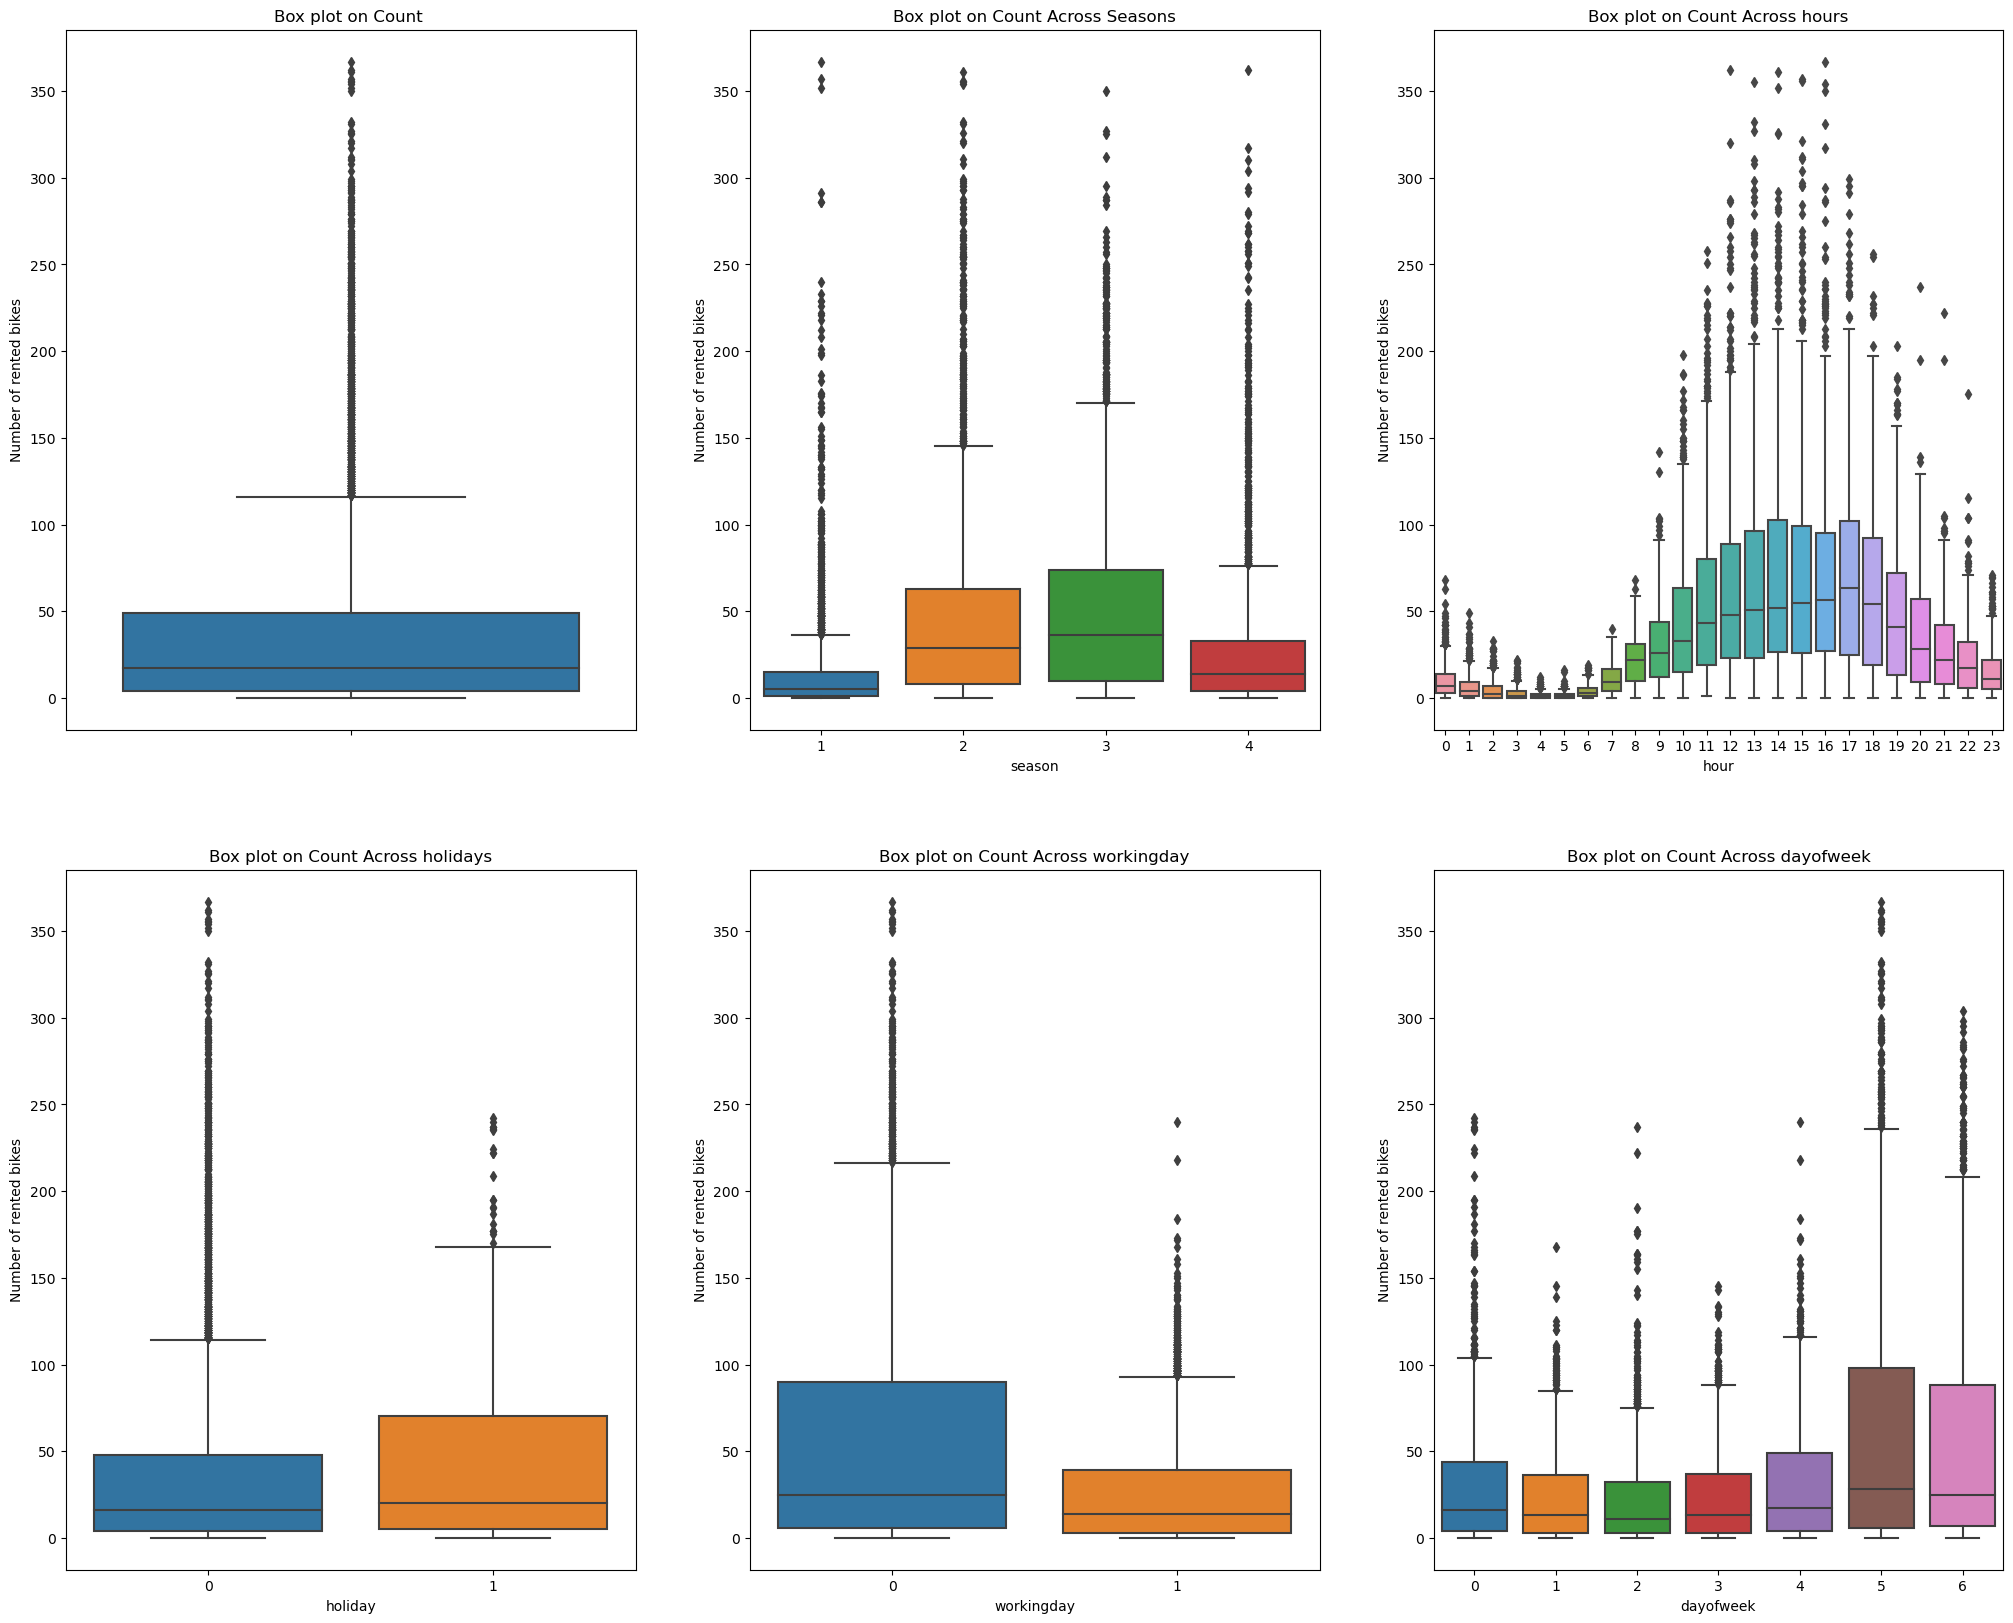

In [33]:
fig, ax = plt.subplots(2, 3, figsize=(25, 20))
sns.boxplot(y=data["Number of rented bikes"],ax=ax[0][0])
ax[0][0].set_title("Box plot on Count ")

sns.boxplot(x="season",y="Number of rented bikes",data=data,ax=ax[0][1])
ax[0][1].set_title("Box plot on Count Across Seasons")

sns.boxplot(x="hour",y="Number of rented bikes",data=data,ax=ax[0][2])
ax[0][2].set_title("Box plot on Count Across hours")

sns.boxplot(x="holiday",y="Number of rented bikes",data=data,ax=ax[1][0])
ax[1][0].set_title("Box plot on Count Across holidays")

sns.boxplot(x="workingday",y="Number of rented bikes",data=data,ax=ax[1][1])
ax[1][1].set_title("Box plot on Count Across workingday")

sns.boxplot(x="dayofweek",y="Number of rented bikes",data=data,ax=ax[1][2])
ax[1][2].set_title("Box plot on Count Across dayofweek")

<Axes: >

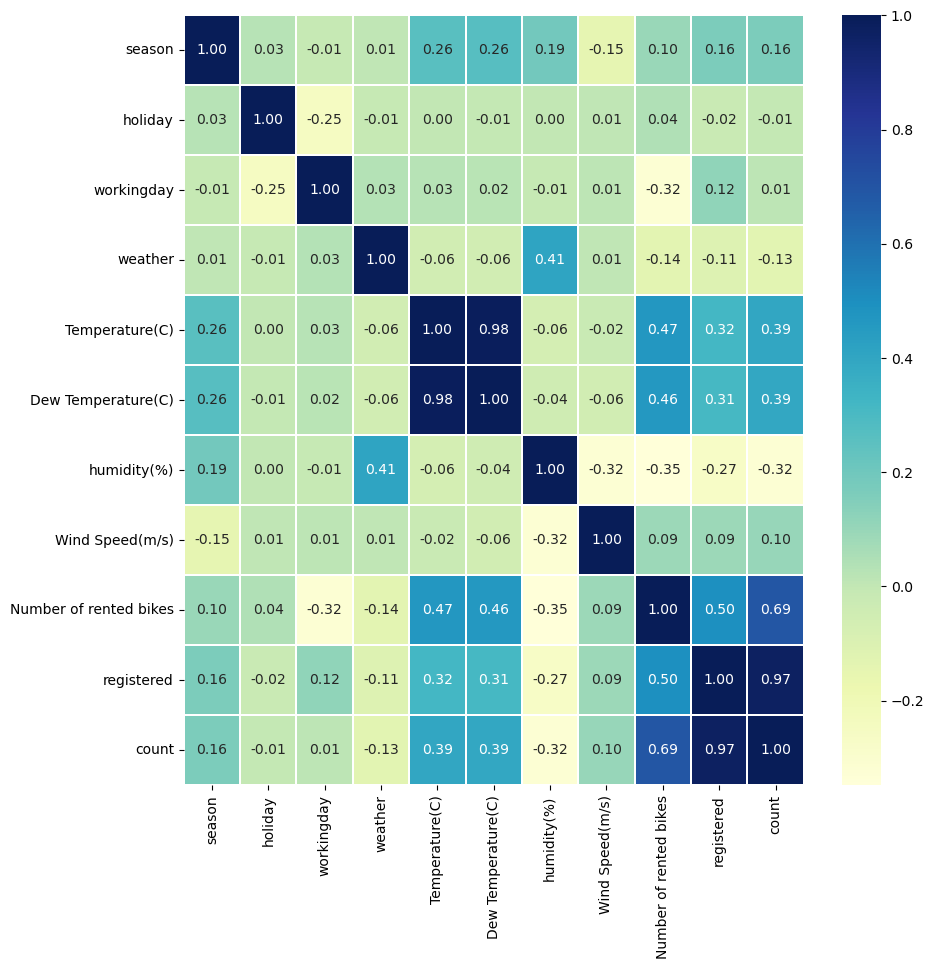

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True,fmt='.2f',linewidths=0.1)

<Axes: xlabel='Number of rented bikes', ylabel='count'>

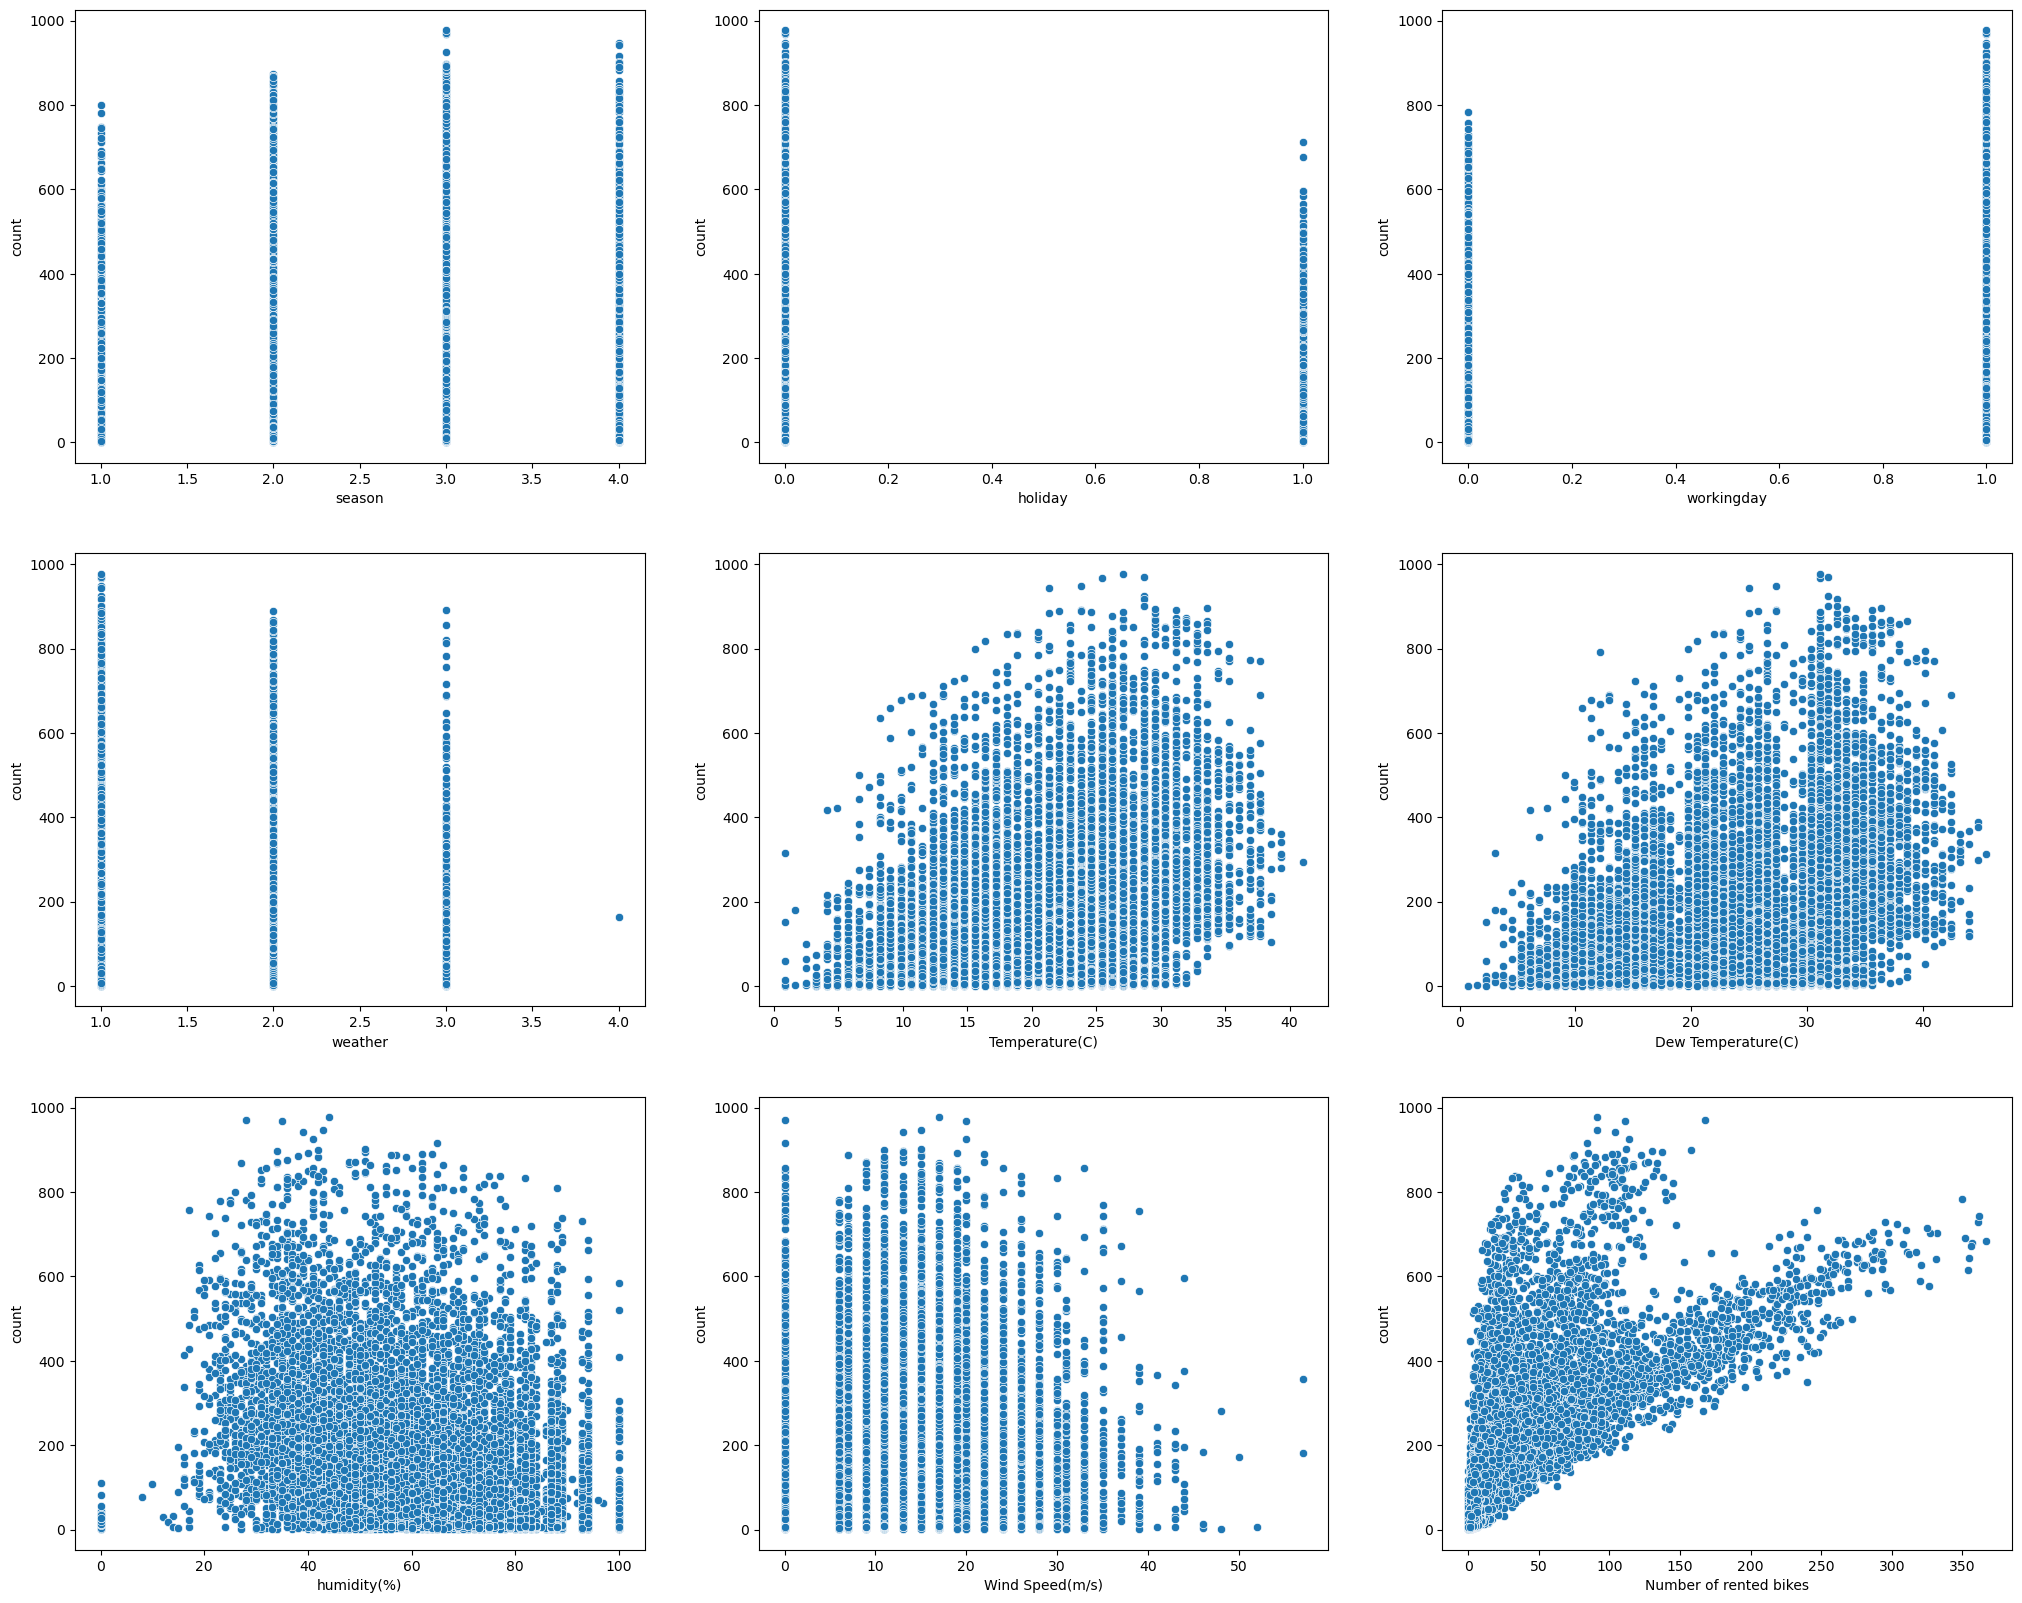

In [39]:
fig, ax = plt.subplots(3, 3, figsize=(25, 20))

sns.scatterplot(x="season",y="count",data=data,ax=ax[0][0])
sns.scatterplot(x="holiday",y="count",data=data,ax=ax[0][1])
sns.scatterplot(x="workingday",y="count",data=data,ax=ax[0][2])
sns.scatterplot(x="weather",y="count",data=data,ax=ax[1][0])
sns.scatterplot(x="Temperature(C)",y="count",data=data,ax=ax[1][1])
sns.scatterplot(x="Dew Temperature(C)",y="count",data=data,ax=ax[1][2])
sns.scatterplot(x="humidity(%)",y="count",data=data,ax=ax[2][0])
sns.scatterplot(x="Wind Speed(m/s)",y="count",data=data,ax=ax[2][1])
sns.scatterplot(x="Number of rented bikes",y="count",data=data,ax=ax[2][2])

In [43]:
# Sorted correlation of variables to the target
df1corr = pd.DataFrame(data.corr().unstack().sort_values(ascending=False)['Number of rented bikes'],
                       columns=['correlation to the target'])
df1corr

,correlation to the target
Number of rented bikes,1.000000
count,0.690414
registered,0.497250
Temperature(C),0.467097
Dew Temperature(C),0.462067
hour,0.302045
weekday,0.246959
dayofweek,0.246959
year,0.145241
season,0.096758


<Axes: ylabel='Density'>

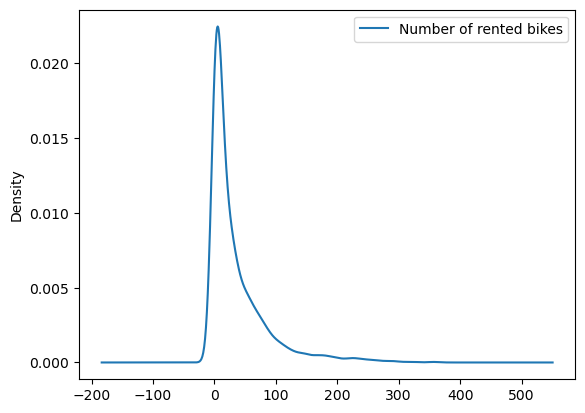

In [47]:
data.plot(x='datetime',y='Number of rented bikes',kind='kde')

In [45]:
# Seasons with most rents
df1_seasons = pd.DataFrame(data.groupby('season').sum()['Number of rented bikes'].sort_values(ascending=False))
df1_seasons

,Number of rented bikes
season,
3,142718
2,129672
4,78140
1,41605


Text(0.5, 1.0, 'Number of rented bike per season')

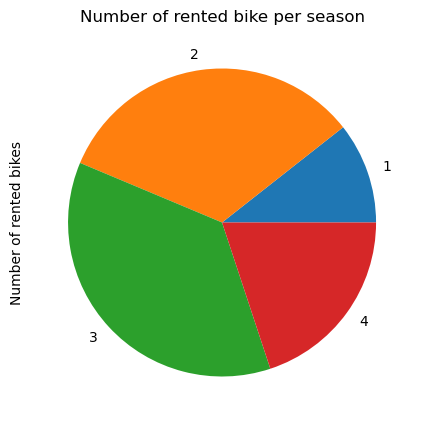

In [48]:
plt.figure(figsize=(5,5))
data.groupby('season').sum()['Number of rented bikes'].plot.pie()
plt.title("Number of rented bike per season")

<Axes: title={'center': 'Year = 2012'}, xlabel='hour'>

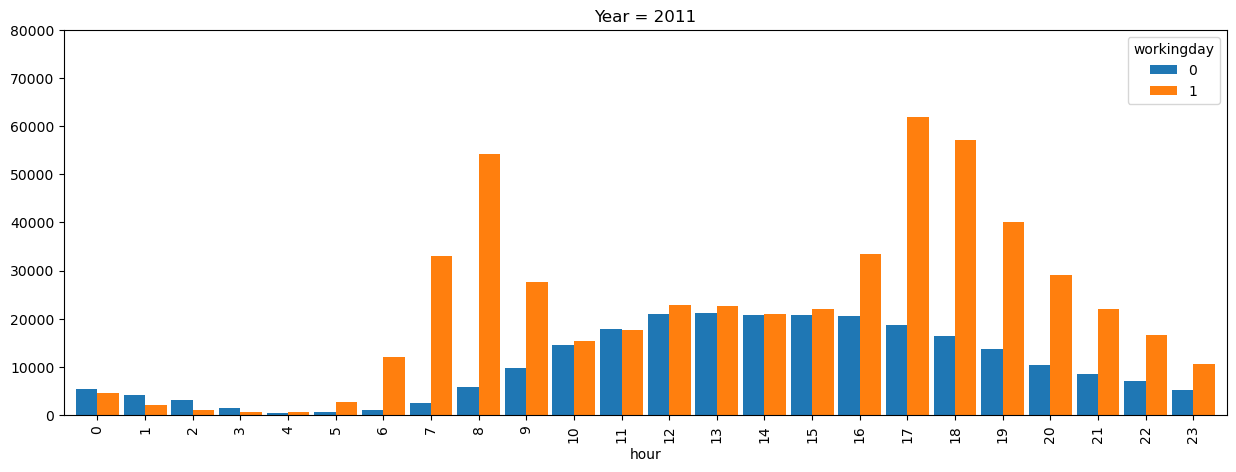

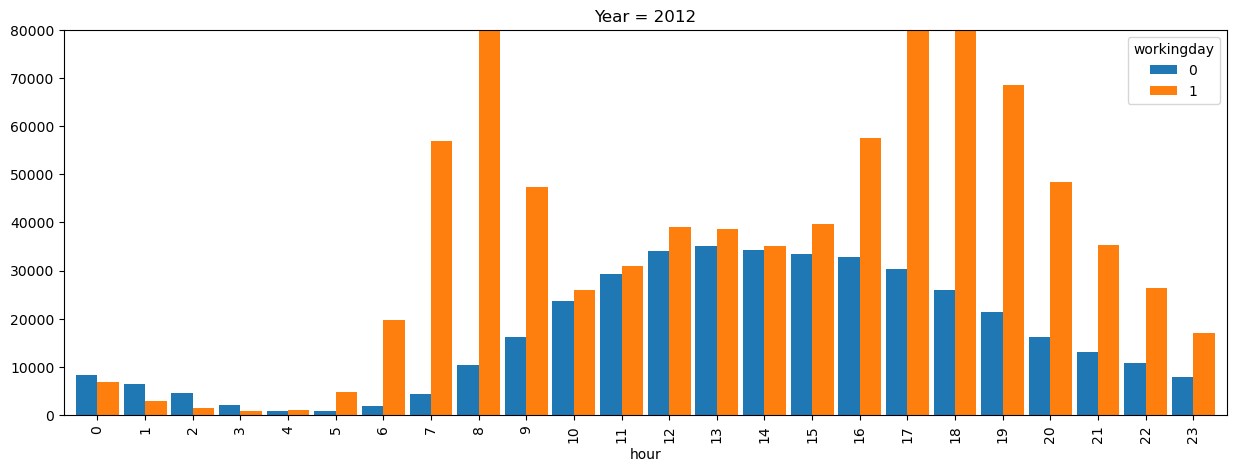

In [50]:
# method for creating the count plot based on hour for a given year 
def plot_by_hour(data, year=None, agg='sum'):
    dd = data
    if year: dd = dd[ dd.datetime.dt.year == year ]
    # extracting the hour data if the year in the data is equal to the year passed as argument
    dd.loc[:, ('hour')] = dd.datetime.dt.hour 
    
    by_hour = dd.groupby(['hour', 'workingday'])['count'].agg(agg).unstack() # groupby hour and working day
    # returning the figure grouped by hour
    return by_hour.plot(kind='bar', ylim=(0, 80000), figsize=(15,5), width=0.9, title="Year = {0}".format(year)) 


plot_by_hour(data, year=2011) # plotting the count plot based on hour for 2011 
plot_by_hour(data, year=2012) # plotting the count plot based on hour for 2012

<Axes: title={'center': 'Rent bikes per hour in 2011 and 2012'}, xlabel='hour'>

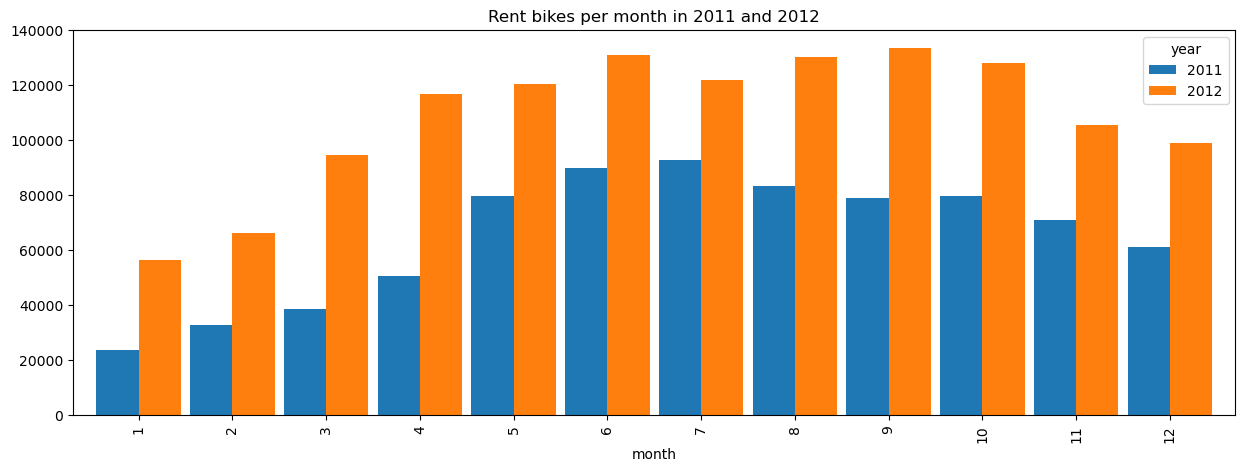

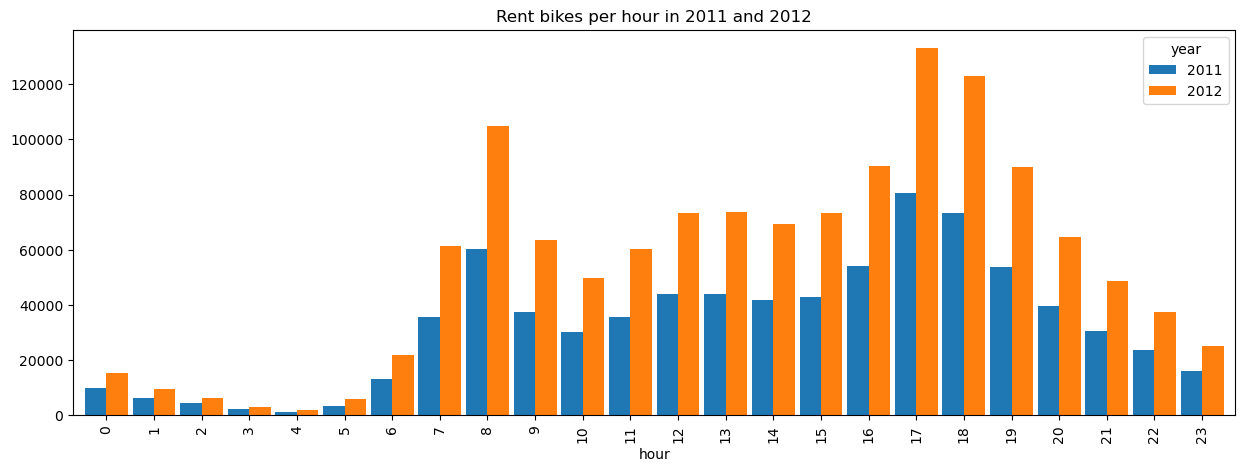

In [54]:
# method for creating the count plot based on year 
def plot_by_year(agg_attr, title):
    # extracting the required fields
    dd = data.copy()
    dd['year'] = data.datetime.dt.year # extratcing the year
    dd['month'] = data.datetime.dt.month # extratcing the month
    dd['hour'] = data.datetime.dt.hour # extratcing the hour
    
    by_year = dd.groupby([agg_attr, 'year'])['count'].agg('sum').unstack() # groupby year
    return by_year.plot(kind='bar', figsize=(15,5), width=0.9, title=title) # returning the figure grouped by year


plot_by_year('month', "Rent bikes per month in 2011 and 2012") # plotting monthly bike rentals based on year
plot_by_year('hour', "Rent bikes per hour in 2011 and 2012") # plotting hourls bike rentals based  on year


In [55]:
# method to plot a graph for count per hour
def plot_hours(data, message = ''):
    dd = data.copy()
    dd['hour'] = data.datetime.dt.hour # extratcing the hour
    
    hours = {}
    for hour in range(24):
        hours[hour] = dd[ dd.hour == hour ]['count'].values

    plt.figure(figsize=(20,10))
    plt.ylabel("Count rent")
    plt.xlabel("Hours")
    plt.title("count vs hours\n" + message)
    plt.boxplot( [hours[hour] for hour in range(24)] )
    
    axis = plt.gca()
    axis.set_ylim([1, 1100])
 

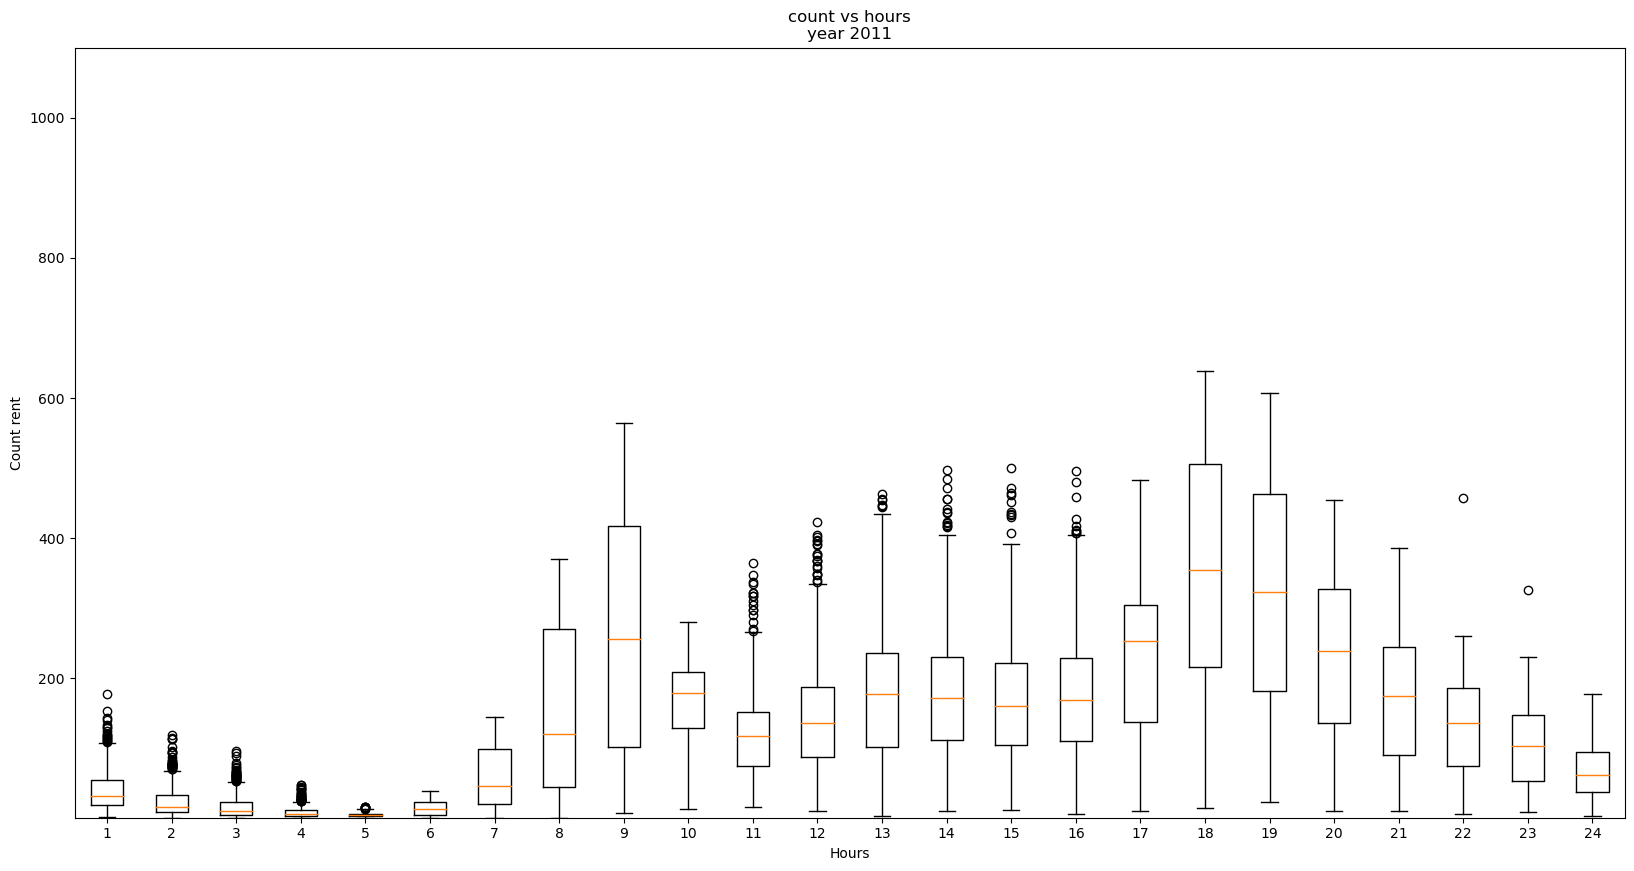

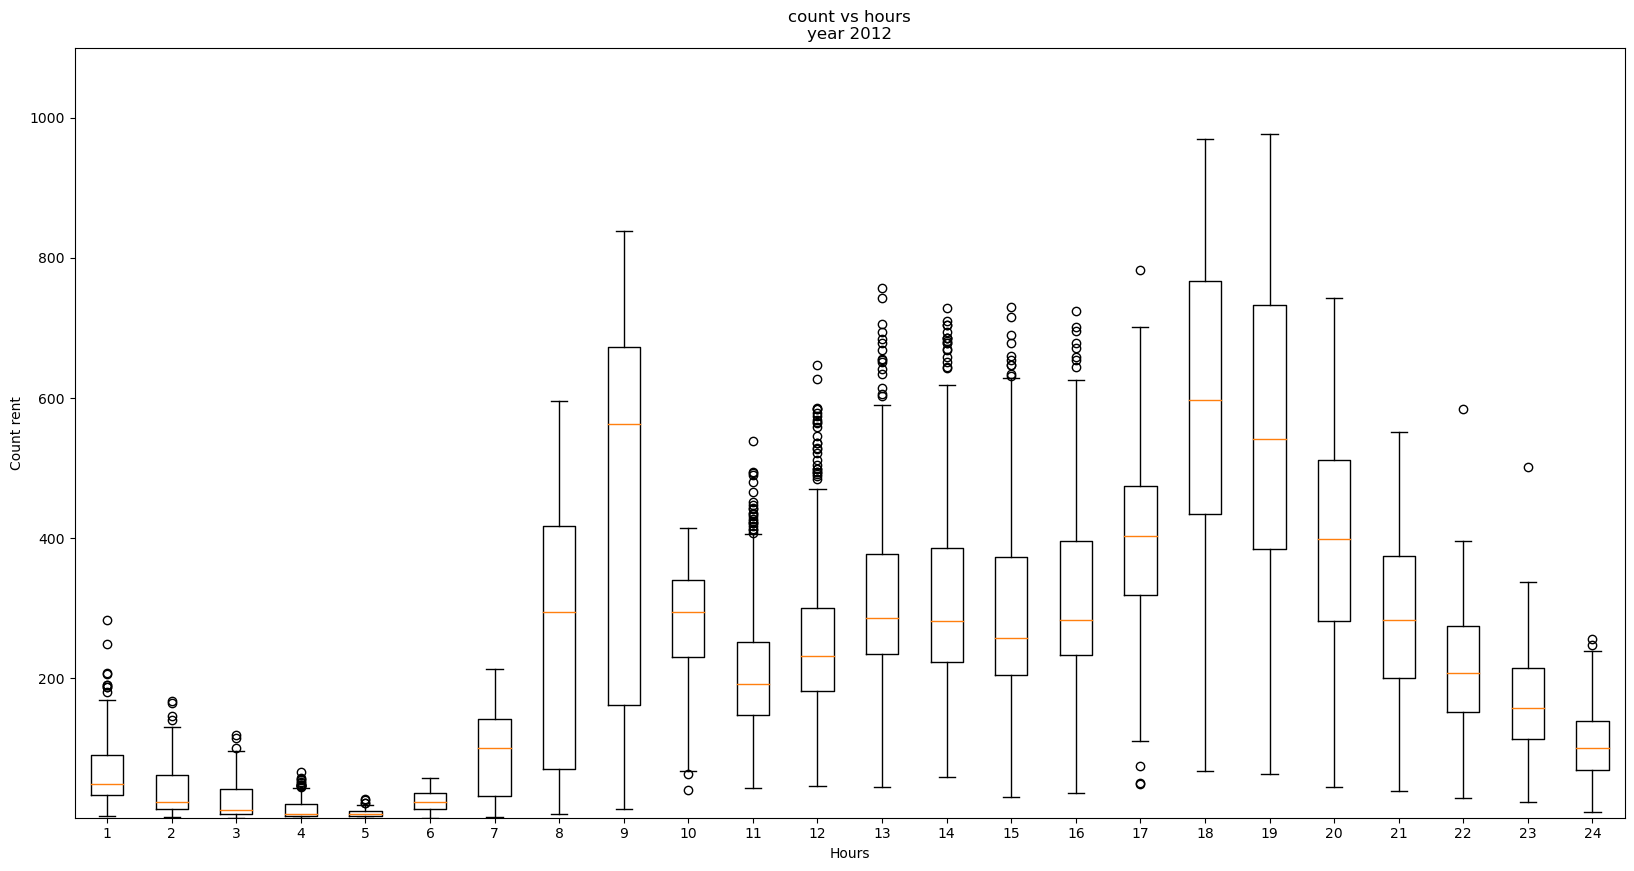

In [57]:
plot_hours( data[data.datetime.dt.year == 2011], 'year 2011') # box plot for hourly count for the mentioned year
plot_hours( data[data.datetime.dt.year == 2012], 'year 2012') # box plot for hourly count for the mentioned year

In [67]:
data_t = pd.read_csv('test_bikes.csv')

In [69]:
dt = pd.to_datetime(data["datetime"]) # converting the column to datetime for train dataset
data["hour"] = dt.map(lambda x: x.hour) # adding the hour column for train dataset
data.head()

,datetime,season,holiday,workingday,weather,Temperature(C),Dew Temperature(C),humidity(%),Wind Speed(m/s),Number of rented bikes,registered,count,month,hour,weekday,day,year,dayofweek,month_start,woy
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,5,1,2011,5,True,52
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,5,1,2011,5,True,52
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2,5,1,2011,5,True,52
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3,5,1,2011,5,True,52
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4,5,1,2011,5,True,52


In [70]:
dt_test = pd.to_datetime(data_t["datetime"]) # converting the column to datetime for test dataset
data_t["hour"] = dt_test.map(lambda x: x.hour) # adding the hour column for test dataset
data_t.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4


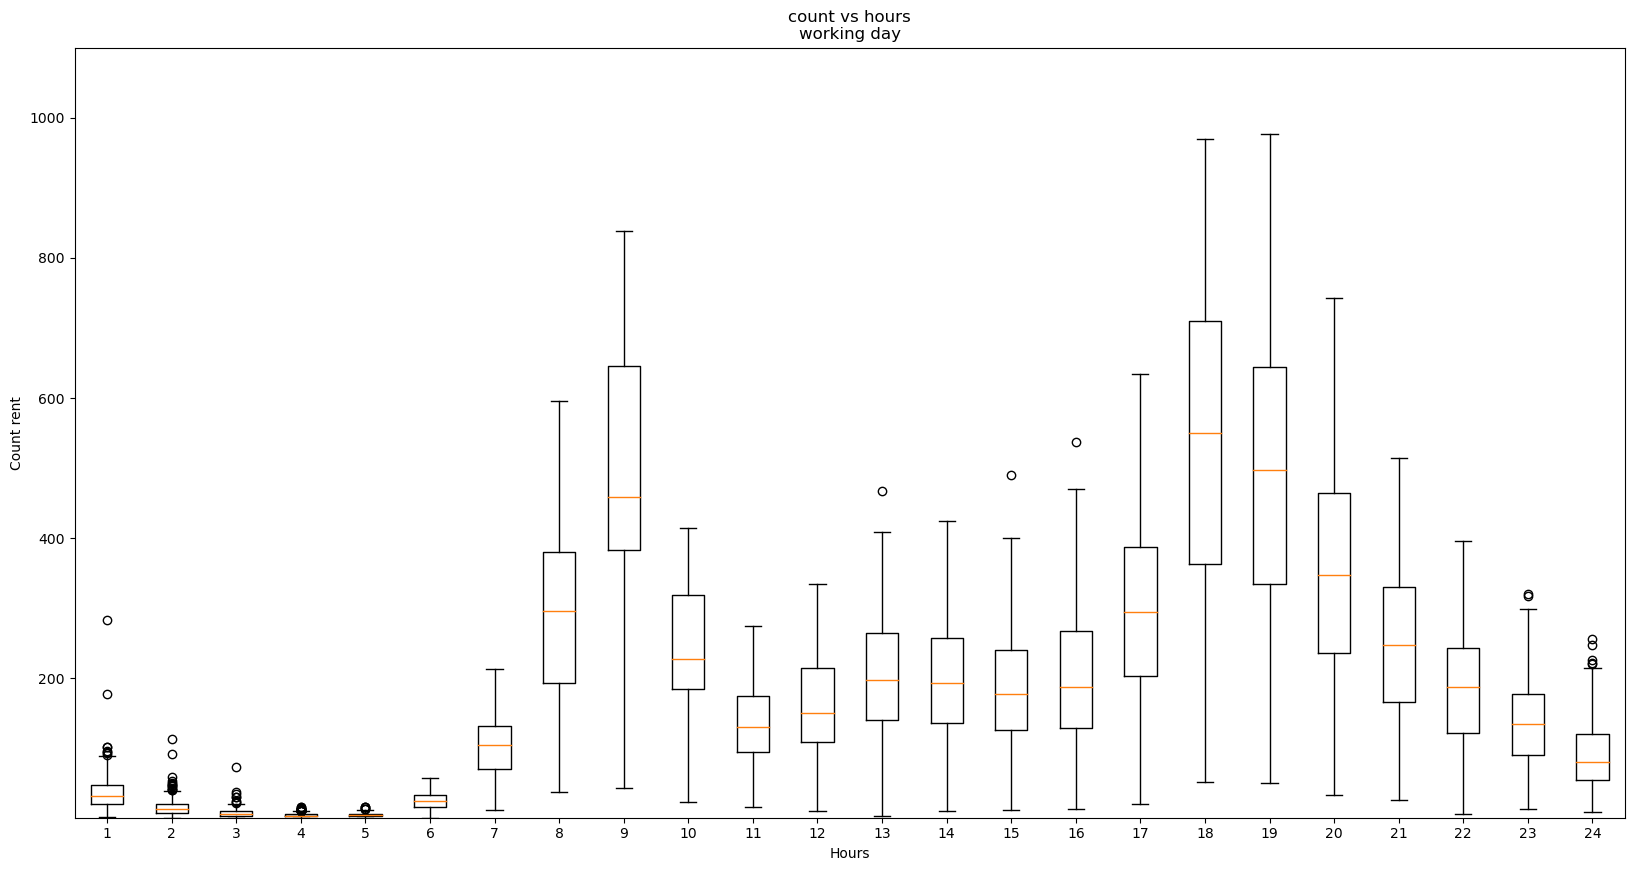

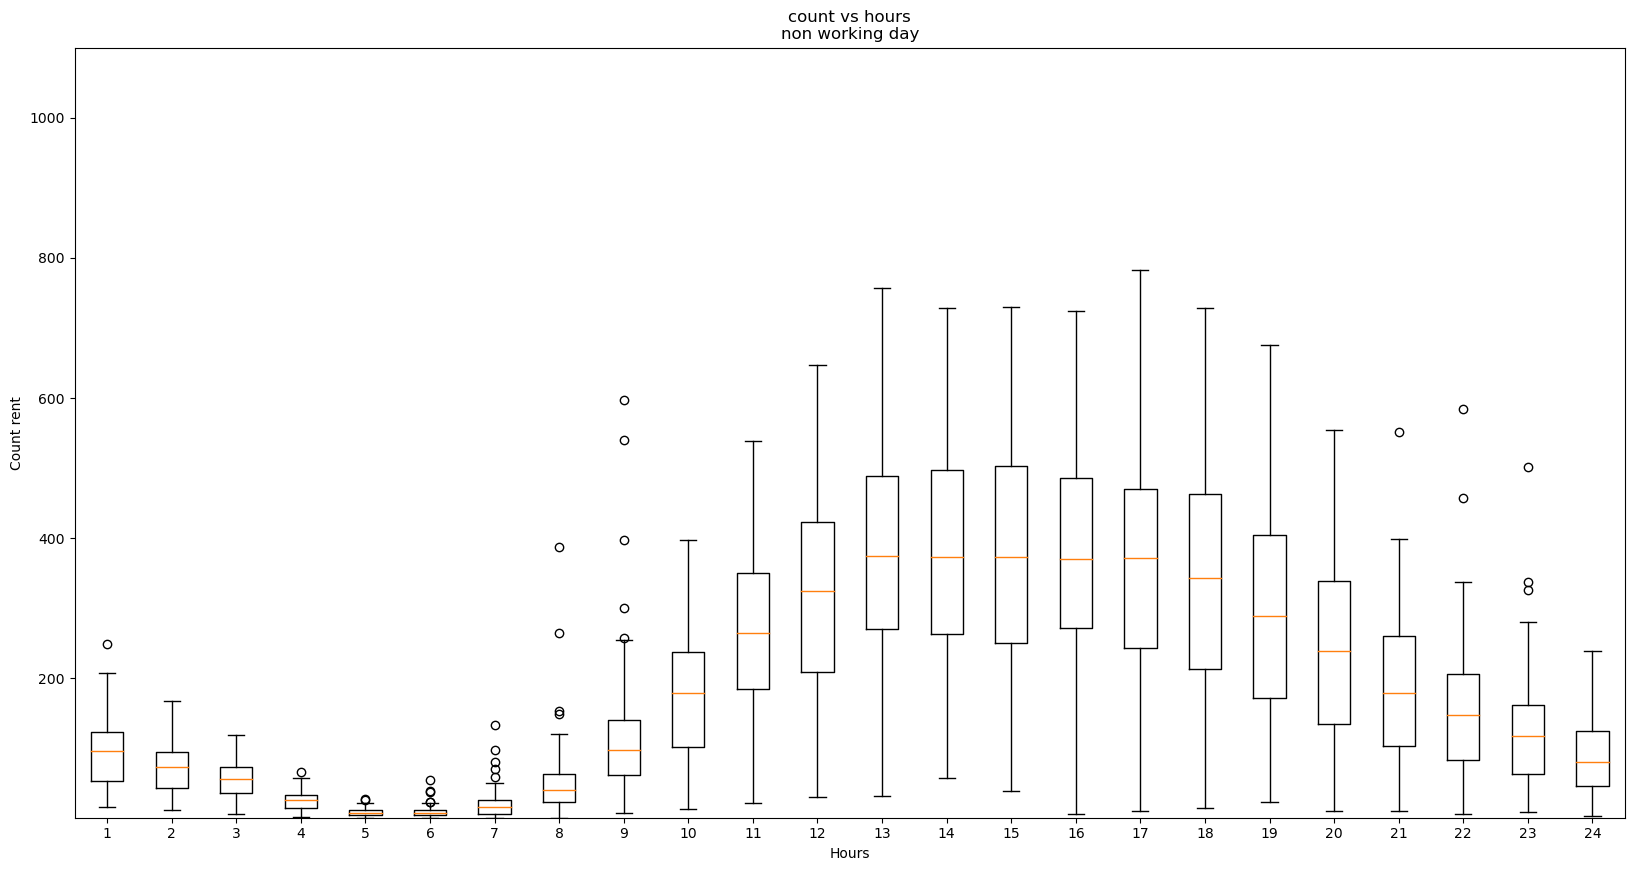

In [61]:
 # plotting hourly count of rented bikes for working days for a given year # plotting hourly count of rented bikes for working days for a given year
plot_hours( data[data.workingday == 1], 'working day')
 # plotting hourly count of rented bikes for non-working days for a given year
plot_hours( data[data.workingday == 0], 'non working day')

In [71]:
# method to convert categorical data to numerical data
def categorical_to_numeric(x):
    if 0 <=  x < 6:
        return 0
    elif 6 <= x < 13:
        return 1
    elif 13 <= x < 19:
        return 2
    elif 19 <= x < 24:
        return 3

In [72]:
# applying the above conversion logic to training data
data['hour'] = data['hour'].apply(categorical_to_numeric)
data.head()

,datetime,season,holiday,workingday,weather,Temperature(C),Dew Temperature(C),humidity(%),Wind Speed(m/s),Number of rented bikes,registered,count,month,hour,weekday,day,year,dayofweek,month_start,woy
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,5,1,2011,5,True,52
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,0,5,1,2011,5,True,52
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,0,5,1,2011,5,True,52
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,0,5,1,2011,5,True,52
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,0,5,1,2011,5,True,52


In [74]:
data_t['hour'] = data_t['hour'].apply(categorical_to_numeric) # applying the above conversion logic to test data
data_t.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,0


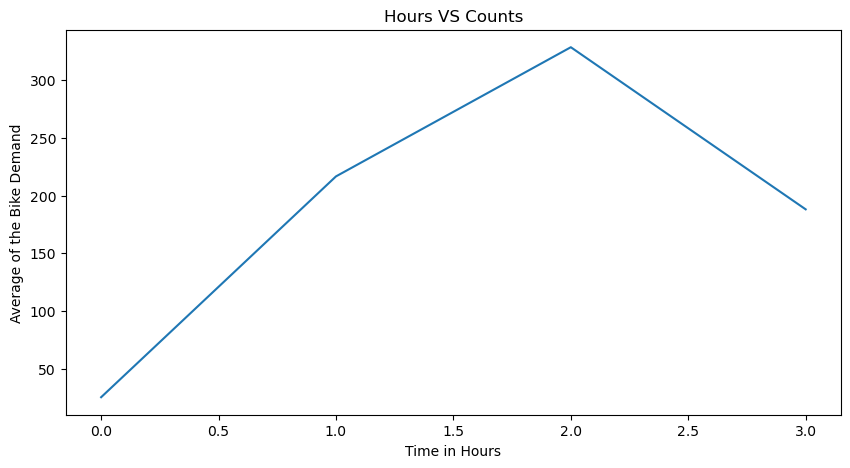

In [76]:
# an Hour bs Count Graph depicting average bike demand based on the hour 
figure,axes = plt.subplots(figsize = (10, 5))
hours = data.groupby(["hour"]).agg("mean")["count"]  
hours.plot(kind="line", ax=axes) 
plt.title('Hours VS Counts')
axes.set_xlabel('Time in Hours')
axes.set_ylabel('Average of the Bike Demand')
plt.show()